<a href="https://colab.research.google.com/github/joni901/Benford_Law/blob/main/Benford_Law_hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d2d9b3e24693429545d4be382c25559a7ee2ac47af9d96f3d85d7aa9a388bb92
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [ ]:
import requests
import json
import wget
import pandas as pd
from zipfile import ZipFile

In [ ]:
base_url = "https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/"
zip_files = []
for year in range(2018, 2024):
  zip_files.append(f"itr_cia_aberta_{year}.zip")

In [ ]:
for file in zip_files:
    wget.download(base_url + file)
    with ZipFile(file, 'r') as zipObj:
        zipObj.extractall("CVM")

In [ ]:
itr = "itr_public_company_"
file_type = ["ind_", "con_"]
files = ["BPA_", "BPP_", "DFC_MD_", "DFC_MI_", "DMPL_", "DRA_", "DRE_", "DVA_"]
list_of_dfs = []
path = "/content/"
for file in files:
    for f_type in file_type:
        for year in range(2018, 2023):
            try:
                print(f"{path}{itr}{file}{f_type}{year}")
                file_data = pd.read_csv(f"{path}{itr}{file}{f_type}{year}.csv", sep="|", encoding="ISO-8859-1", decimal=",")
                file_df = pd.DataFrame(file_data)

                file_df['Source'] = f"{itr}{file}{f_type}{year}"
                list_of_dfs.append(file_df)
            except:
                print(f"File {itr}{file}{f_type}{year} not found")


/content/itr_public_company_BPA_ind_2018
File itr_public_company_BPA_ind_2018 not found
/content/itr_public_company_BPA_ind_2019
File itr_public_company_BPA_ind_2019 not found
/content/itr_public_company_BPA_ind_2020
File itr_public_company_BPA_ind_2020 not found
/content/itr_public_company_BPA_ind_2021
File itr_public_company_BPA_ind_2021 not found
/content/itr_public_company_BPA_ind_2022
File itr_public_company_BPA_ind_2022 not found
/content/itr_public_company_BPA_con_2018
File itr_public_company_BPA_con_2018 not found
/content/itr_public_company_BPA_con_2019
File itr_public_company_BPA_con_2019 not found
/content/itr_public_company_BPA_con_2020
File itr_public_company_BPA_con_2020 not found
/content/itr_public_company_BPA_con_2021
File itr_public_company_BPA_con_2021 not found
/content/itr_public_company_BPA_con_2022
File itr_public_company_BPA_con_2022 not found
/content/itr_public_company_BPP_ind_2018
File itr_public_company_BPP_ind_2018 not found
/content/itr_public_company_BPP_

In [ ]:
nivel_1={'ALPARGATAS S.A.':'ALPA','BANCO BMG S.A.':'BMGB','BCO BRADESCO S.A.':'BBDC','BCO ESTADO DO RIO GRANDE DO SUL S.A.':'BRSR',
         'BCO MERCANTIL DO BRASIL S.A.':'BMEB','BCO PAN S.A.':'BPAN','BRADESPAR S.A.':'BRAP','BRASKEM S.A.':'BRKM',
         'CENTRAIS ELET BRAS S.A. - ELETROBRAS'	:'ELET','CIA ENERGETICA DE MINAS GERAIS - CEMIG':'CMIG',
         'CIA FERRO LIGAS DA BAHIA - FERBASA':'FESA','CIA FIACAO TECIDOS CEDRO CACHOEIRA':'CEDO',
         'CTEEP - CIA TRANSMISSÃO ENERGIA ELÉTRICA PAULISTA':'TRPL', 'DEXXOS PARTICIPACOES S.A.':'DEXP',
        'EUCATEX S.A. INDUSTRIA E COMERCIO':'EUCA', "FRAS-LE S.A.":	'FRAS', "GERDAU S.A.":'GGBR', "IGUATEMI S.A.":"IGTI",
         "ITAU UNIBANCO HOLDING S.A.":"ITUB","ITAUSA S.A.":"ITSA","METALURGICA GERDAU S.A.":"GOAU","OI S.A.":"OIBR",
         "RANDON S.A. IMPLEMENTOS E PARTICIPACOES":"RAPT", "USINAS SID DE MINAS GERAIS S.A.-USIMINAS":'USIM'}


nivel_2={
    "ALUPAR INVESTIMENTO S/A":"ALUP", "AZUL S.A.":"AZUL","BCO ABC BRASIL S.A.":"ABCB", "BCO BTG PACTUAL S.A.":"BPAC",
    "BCO PINE S.A.":"PINE", "BR ADVISORY PARTNERS PARTICIPAÇÕES S.A.":"BRBI", "CENTRAIS ELET DE SANTA CATARINA S.A.":"CLSC",
    "CIA PARANAENSE DE ENERGIA - COPEL":"CPLE", "CIA SANEAMENTO DO PARANA - SANEPAR":"SAPR", "CSN MINERAÇÃO S.A.":"CMIN",
    "ENERGISA S.A.":"ENGI", "GOL LINHAS AEREAS INTELIGENTES S.A.":"GOLL", "KLABIN S.A.":"KLBN", "MARCOPOLO S.A.":"POMO",
    "MULTIPLAN - EMPREEND IMOBILIARIOS S.A.":"MULT", "PETROLEO BRASILEIRO S.A. PETROBRAS":"PETR", "RAIZEN S.A.":"RAIZ",
    "RENOVA ENERGIA S.A.":"RNEW", "TAURUS ARMAS S.A.":"TASA", "TRACK & FIELD CO S.A.":"TFCO",
    "TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.":"TAEE"
}

Novomercado={
    "3R PETROLEUM ÓLEO E GÁS S.A":"RRRP", "AERIS IND. E COM. DE EQUIP. GERACAO DE ENERGIA S/A":"AERI",
    "AES BRASIL ENERGIA S.A.":"AESB",'AGROGALAXY PARTICIPAÇÕES S.A.':"AGXY", "ALLIANÇA SAÚDE E PARTICIPAÇÕES S.A.":"ALLD",
    "ALLOS S.A	":"ALOS", 'ALLPARK EMPREENDIMENTOS PARTICIPACOES SERVICOS S.A':'ALPK',"ALPHAVILLE S.A.":"AVLL",
    "AMBIPAR PARTICIPACOES E EMPREENDIMENTOS S/A":"AMBP", "AMERICANAS S.A":"AMER","ANIMA HOLDING S.A.":"ANIM",
    "AREZZO INDÚSTRIA E COMÉRCIO S.A.":"ARZZ","ARMAC LOCAÇÃO. LOGÍSTICA E SERVIÇOS S.A.":"ARML",
    "ATACADÃO S.A.":'CRFB', 'AUREN ENERGIA S.A.':"AURE", "B3 S.A. - BRASIL. BOLSA. BALCÃO":"B3SA",
    "BB SEGURIDADE PARTICIPAÇÕES S.A.":"BBSE", "BCO BRASIL S.A.":"BBAS","BEMOBI MOBILE TECH S.A.":'BMOB',
    'BLAU FARMACÊUTICA S.A.':"BLAU", "BOA SAFRA SEMENTES S.A.":"SOJA", "BRASILAGRO - CIA BRAS DE PROP AGRICOLAS":"AGRO",
    "BRF S.A.":"BRFS", "BRISANET PARTICIPAÇÕES S.A.":"BRIT","CAIXA SEGURIDADE PARTICIPAÇÕES S.A.":"CXSE",
    "CAMIL ALIMENTOS S.A.":"CAML", "CCR S.A.":"CCRO", "CEA MODAS S.A.":"CEAB", "CIA BRASILEIRA DE DISTRIBUICAO":"PCAR",
    "CIA SANEAMENTO BASICO EST SAO PAULO":"SBSP", "CIA SANEAMENTO DE MINAS GERAIS-COPASA":"CSMG",
    "CIELO S.A. - INSTITUIÇÃO DE PAGAMENTO":"CIEL", "CLEAR SALE S.A.":"CLSA", "CM HOSPITALAR S.A.":"VVEO",
    "COGNA EDUCAÇÃO S.A.":"COGN","COMPANHIA BRASILEIRA DE ALUMÍNIO":'CBAV','CONSTRUTORA TENDA S.A.':"TEND",
    'COSAN S.A.':'CSAN', 'CPFL ENERGIA S.A.':'CPFE', 'CRUZEIRO DO SUL EDUCACIONAL S.A.':'CSED',
    'CSU DIGITAL S.A.':'CSUD', 'CURY CONSTRUTORA E INCORPORADORA S.A.':"CURY",
    "CVC BRASIL OPERADORA E AGÊNCIA DE VIAGENS S.A.":"CVCB", 'CYRELA BRAZIL REALTY S.A.EMPREEND E PART':"CYRE",
    "D1000 VAREJO FARMA PARTICIPAÇÕES S.A.":"DMVF", "DESKTOP S.A.":"DESK", "DEXCO S.A.":"DXCO",
    "DIAGNOSTICOS DA AMERICA S.A.":"DASA", "DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS":"PNVL",
    "DIRECIONAL ENGENHARIA S.A.":"DIRR", "DOTZ S.A.":"DOTZ", "ECORODOVIAS INFRAESTRUTURA E LOGÍSTICA S.A.":"ECOR",
    "ELETROMIDIA S.A.":"ELMD", "EMBRAER S.A.":"EMBR", "EMPREENDIMENTOS PAGUE MENOS S.A.":"PGMN",
    "NAUTA PARTICIPAÇÕES S.A.":"ENAT","ENEVA S.A":"ENEV","ENGIE BRASIL ENERGIA S.A.":"EGIE",
    "ENJOEI S.A.":"ENJU", "EQUATORIAL ENERGIA S.A.":"EQTL", "ETERNIT S.A.":"ETER",
    "EVEN CONSTRUTORA E INCORPORADORA S.A.":"EVEN", "EZ TEC EMPREEND. E PARTICIPACOES S.A.":"EZTC",
    "FERTILIZANTES HERINGER S.A.":'FHER', "FLEURY S.A.":"FLRY", "GAFISA S.A.":"GFSA",
    "GETNINJAS S.A.":"NINJ", "GPS PARTICIPACOES E EMPREENDIMENTOS S.A.":"GGPS",
    "GRENDENE S.A.":"GRND", "GRUPO CASAS BAHIA S.A.":"BHIA", "GRUPO DE MODA SOMA S.A.":'SOMA','GRUPO MATEUS S.A.':"GMAT",
    "GRUPO SBF SA":"SBFG","GUARARAPES CONFECCOES S.A.":'GUAR',"HAPVIDA PARTICIPACOES E INVESTIMENTOS SA":"HAPV",
    "HBR REALTY EMPREENDIMENTOS IMOBILIARIOS S/A":"HBRE", "HELBOR EMPREENDIMENTOS S.A.":"HBOR", "HIDROVIAS DO BRASIL S.A.":"HBSA",
    "HOSPITAL MATER DEI S/A":"MATD", "HYPERA S.A.":"HYPE", "INFRACOMMERCE CXAAS S.A.":"IFCM",
    "INTELBRAS S.A. IND DE TELEC ELETRONICA BRASILEIRA":"INTB", "INTERNATIONAL MEAL COMPANY ALIMENTACAO S.A.":"MEAL",
    "IOCHPE MAXION S.A.":"MYPK", "IRANI PAPEL E EMBALAGEM S.A.":'RANI', "IRB - BRASIL RESSEGUROS S.A.":"IRBR",
    "JALLES MACHADO S.A.":"JALL", "JBS S.A.":"JBSS", "JHSF PARTICIPACOES S.A.":"JHSF", "JSL S.A.":"JSLG",
    "KEPLER WEBER S.A.":'KEPL', "KORA SAÚDE PARTICIPAÇÕES S.A":'KRSA', "LAVVI EMPREENDIMENTOS IMOBILIÁRIOS S.A.":"LAVV",
    "LIGHT S.A.":"LIGT", 'LIVETECH DA BAHIA INDUSTRIA E COMERCIO S/A':"LVTC", 'LOCALIZA RENT A CAR S.A.':"RENT",
    'LOCAWEB SERVIÇOS DE INTERNET S.A.':"LWSA", "LOG COMMERCIAL PROPERTIES":"LOGG", "LOG-IN LOGISTICA INTERMODAL S.A.":'LOGN',
    'LOJAS QUERO-QUERO S/A':'LJQQ', "LOJAS RENNER S.A.":'LREN',"LPS BRASIL - CONSULTORIA DE IMOVEIS S.A.":"LPSB",
    "LUPATECH S.A.":'LUPA', "M.DIAS BRANCO S.A. IND COM DE ALIMENTOS":"MDIA", "MAGAZINE LUIZA S.A.":"MGLU",
    "MAHLE-METAL LEVE S.A.":"LEVE", "MARFRIG GLOBAL FOODS S.A.":"MRFG", "MARISA LOJAS S.A.":"AMAR",
    "MÉLIUZ S.A.":'CASH', 'MELNICK DESENVOLVIMENTO IMOBILIÁRIO S.A.':"MELK", "METALFRIO SOLUTIONS S.A.":'FRIO',
    'MILLS LOCAÇÃO. SERVIÇOS E LOGÍSTICA S.A':'MILS', 'MINERVA S.A.':'BEEF','MITRE REALTY EMPREENDIMENTOS E PARTICIPAÇÕES S.A.':'MTRE',
    "MOBLY S.A.":"MBLY", "MOURA DUBEUX ENGENHARIA S/A":'MDNE', 'MOVIDA PARTICIPACOES SA':"MOVI", 'MPM CORPÓREOS S.A.':'ESPA',
    'MRV ENGENHARIA E PARTICIPACOES S.A.':'MRVE', "MULTILASER INDUSTRIAL S.A.":'MLAS',"NATURA &CO HOLDING S.A.":"NTCO",
    "NEOENERGIA S.A.":'NEOE',"NEOGRID PARTICIPACOES S.A.":"NGRD", "NEXPE PARTICIPAÇÕES S.A":"NEXP",
    "OCEANPACT SERVICOS MARITIMOS S.A.":"OPCT", "ODONTOPREV S.A.":"ODPV", "ONCOCLINICAS DO BRASIL SERVICOS MEDICOS S.A.":'ONCO',
    "ORIZON VALORIZACAO DE RESIDUOS S.A.":'ORVR', "OSX BRASIL S.A.":'OSXB', "OURO FINO SAUDE ANIMAL PARTICIPACOES S.A.":'OFSA',
    "PADTEC HOLDING S.A.":"PDTC", "PARANAPANEMA S.A.":"PMAM", "PBG S/A":"PTBL", "PDG REALTY S.A. EMPREEND E PARTICIPACOES":"PDGR",
    "PET CENTER COMERCIO E PARTICIPACOES S.A.":"PETZ", "PETRORECÔNCAVO S.A.":"RECV",
    "PLANO & PLANO DESENVOLVIMENTO IMOBILIÁRIO S.A.":"PLPL", "POMIFRUTAS S/A":"FRTA", "PORTO SEGURO S.A.":"PSSA",
    "POSITIVO TECNOLOGIA S.A.":"POSI", "PRINER SERVIÇOS INDUSTRIAIS S.A.":"PRNR", "PRIO S.A.":"PRIO",
    "PROFARMA DISTRIB PROD FARMACEUTICOS S.A.":"PFRM", "QUALICORP CONSULTORIA E CORRETORA DE SEGUROS S.A.":"QUAL",
    "RAIA DROGASIL S.A.":"RADL","REDE DOR SÃO LUIZ S.A.":"RDOR", "RNI NEGÓCIOS IMOBILIÁRIOS S.A.":"RDNI","ROMI S.A.":"ROMI",
    "ROSSI RESIDENCIAL S.A.":"RSID", "RUMO S.A.":"RAIL", "SANTOS BRASIL PARTICIPACOES S.A.":"STBP",
    "SAO CARLOS EMPREEND E PARTICIPACOES S.A.":'SCAR', "SAO MARTINHO S.A.":"SMTO", "SENDAS DISTRIBUIDORA S.A.":'ASAI',
    "SEQUOIA LOGISTICA E TRANSPORTES S.A":"SEQL", "SER EDUCACIONAL S.A.":'SEER', 'SERENA ENERGIA S.A.':"SRNA",
    "SIMPAR S.A.":'SIMH', "SLC AGRICOLA S.A.":"SLCE", "SMARTFIT ESCOLA DE GINÁSTICA E DANÇA S.A.":	"SMFT",
    "SPRINGS GLOBAL PARTICIPACOES S.A.":"SGPS", "SUZANO S.A.":"SUZB", "SYN PROP E TECH S.A.":"SYNE",
    'T4F ENTRETENIMENTO S.A.':"SHOW", 'TC S.A.':"TRAD", "TECHNOS S.A.":"TECN", "TECNISA S.A.":'TCSA',
    "TEGMA GESTAO LOGISTICA S.A.":"TGMA", 'TERRA SANTA PROPRIEDADES AGRICOLAS S.A.':"LAND", "TIM S.A.":"TIMS",
    "TOTVS S.A.":"TOTS", "TPI - TRIUNFO PARTICIP. E INVEST. S.A.":"TPIS", "TRÊS TENTOS AGROINDUSTRIAL S/A":"TTEN",
    'TRISUL S.A.':"TRIS", "TUPY S.A.":"TUPY", "ULTRAPAR PARTICIPACOES S.A.":"UGPA","UNICASA INDÚSTRIA DE MÓVEIS S.A.":"UCAS",
    "UNIFIQUE TELECOMUNICAÇÕES S.A.":"FIQE", "VALE S.A.":"VALE", "VALID SOLUÇÕES S.A.":"VLID",
    "VAMOS LOCAÇÃO DE CAMINHÕES. MÁQUINAS E EQUIP. S.A.":'VAMO', "VESTE S.A. ESTILO":"VSTE", "VIBRA ENERGIA S.A.":"VBBR",
    'VITTIA S.A.':"VITT", "VIVARA PARTICIPAÇOES S.A":"VIVA", "VIVER INCORPORADORA E CONSTRUTORA S.A.":"VIVR", 'VULCABRAS S.A.':'VULC',
    "WEG S.A.":"WEGE", 'WESTWING COMERCIO VAREJISTA S.A.':'WEST', 'WILSON SONS S.A.':'PORT',
    "WIZ CO PARTICIPAÇÕES E CORRETAGEM DE SEGUROS S.A.":"WIZC", "YDUQS PARTICIPACOES S.A.":	"YDUQ"
}

In [ ]:
import os
import pandas as pd

folder_path = '/content/CVM'  # Replace with the actual path
all_files = os.listdir(folder_path)

# Dictionary to store DataFrames by year
dfs_by_year = {
    2018: [],
    2019: [],
    2020: [],
    2021: [],
    2022: [],
    2023: []
}

# Iterating through the files in the folder
for file in all_files:
    file_path = os.path.join(folder_path, file)

    # Check if the file is of the desired type (CSV or Excel)
    for year in range(18, 24):
        if file.endswith(f'{year}.csv'):
            try:
                df = pd.read_csv(file_path, encoding='latin1', delimiter=';')  # Try 'latin1'
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='cp1252')  # Try 'cp1252' if 'latin1' fails
                except UnicodeDecodeError:
                    print(f"Unable to read the file {file_path} due to an encoding error.")
                    continue
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            continue  # Skip files that are not of the desired type

        # Add the DataFrame to the correct list based on the year
        dfs_by_year[year + 2000].append(df)

# Concatenate the DataFrames for each year
for year in dfs_by_year:
    if dfs_by_year[year]:
        dfs_by_year[year] = pd.concat(dfs_by_year[year], ignore_index=True)




In [ ]:
# Function to check the company's code
def check_company(company):
    if company in nivel_1.keys():
        return "lista_1"
    elif company in nivel_2.keys():
        return "lista_2"
    elif company in Novomercado.keys():
        return "NovoMercado"
    else:
        pass

# Apply the function to the column
for year, df in dfs_by_year.items():
    df['code'] = df['DENOM_CIA'].apply(check_company)
for year, df in dfs_by_year.items():
    df


In [ ]:
import numpy as np
from collections import Counter

# Function to count the first digit in a column and return relative frequencies (percentages)
def count_first_digits(df):
    digit_frequency = {}
    total_count = 0

    for num in df['VL_CONTA']:
        # Convert the value to string, remove signs and leading zeros, and check if it starts with a valid digit
        str_num = str(num).lstrip('-').lstrip('0')
        if str_num and str_num[0].isdigit() and str_num[0] in '123456789':
            first_digit = str_num[0]
            # Increment the count for this digit in the dictionary
            digit_frequency[first_digit] = digit_frequency.get(first_digit, 0) + 1
            total_count += 1

    # Convert counts to percentages
    for digit in digit_frequency:
        digit_frequency[digit] = (digit_frequency[digit] / total_count) * 100

    return digit_frequency


# Function to calculate the expected distribution according to Benford's Law, in percentages
def benford_distribution(d):
    return np.log10(1 + 1 / d) * 100

# Function to calculate the expected Benford distribution for digits 1 to 9
def benford_law():
    return [benford_distribution(d) for d in range(1, 10)]

# Function to calculate the d* statistic between observed and expected frequencies
def calculate_d_star(observed_perc, expected_perc):
    squared_diffs = [(obs - exp) ** 2 for obs, exp in zip(observed_perc, expected_perc)]
    d_star = np.sqrt(sum(squared_diffs)) / 1.03606  # Normalization factor for Benford
    return d_star

# Function to convert digit counts to percentages
def convert_to_percentage(frequencies):
    total = sum(frequencies.values())
    return [(frequencies[str(d)] / total) * 100 for d in range(1, 10)]


# d*

## Observed vs Expected

Let:

- **Observed percentages**: $O_1, O_2, ..., O_9$  
- **Expected percentages (Benford)**: $E_1, E_2, ..., E_9$

We want a **single metric** to measure deviation.

---

##  d* Statistic

The **d\*** statistic is a normalized measure of deviation:

$$
d^* = \frac{\sqrt{\sum_{i=1}^{9} (O_i - E_i)^2}}{K}
$$

Where:

- $O_i$ = observed percentage of digit $i$  
- $E_i$ = expected percentage from Benford's Law  
- $K = 1.03606$ → normalization factor for comparability

**Interpretation:**

- $d^* \approx 0$ → data closely follows Benford  
- Higher $d^*$ → more deviation → potential anomalies

---

Analyzing year 2018:
First-digit frequencies for category lista_1 in year 2018:
{'1': 30.868830925126666, '5': 7.821354850816288, '4': 10.114468005254269, '3': 11.8521298555076, '2': 17.035091011446802, '7': 6.068680803152562, '6': 6.62976168136611, '9': 4.511165321823982, '8': 5.0985175455057234}
d* for digit 1 in category lista_1 in year 2018: 0.7391766487737657%
d* for digit 2 in category lista_1 in year 2018: 0.5540556474734302%
d* for digit 3 in category lista_1 in year 2018: 0.6194079544837093%
d* for digit 4 in category lista_1 in year 2018: 0.40872797371641306%
d* for digit 5 in category lista_1 in year 2018: 0.09340168903943168%
d* for digit 6 in category lista_1 in year 2018: 0.06265783998534014%
d* for digit 7 in category lista_1 in year 2018: 0.2601066592512874%
d* for digit 8 in category lista_1 in year 2018: 0.016152249128820514%
d* for digit 9 in category lista_1 in year 2018: 0.06233590163072841%
First-digit frequencies for category lista_2 in year 2018:
{'1': 30.221194

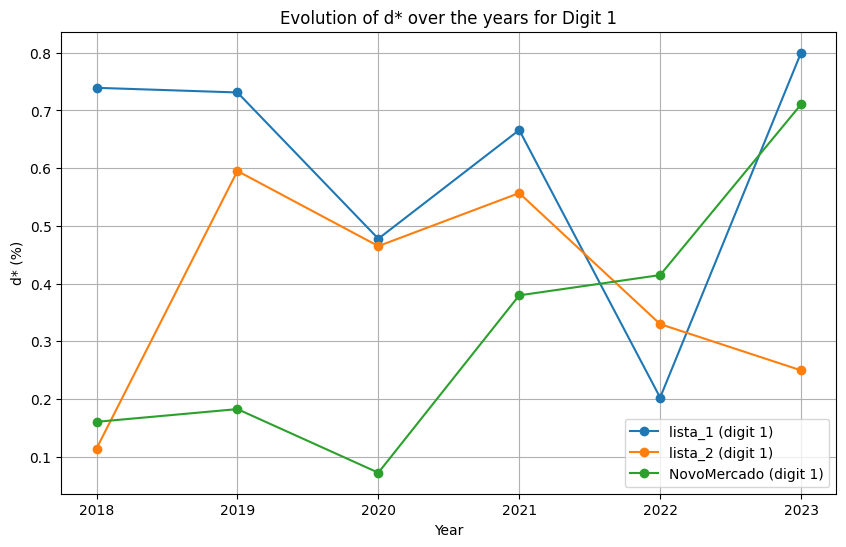

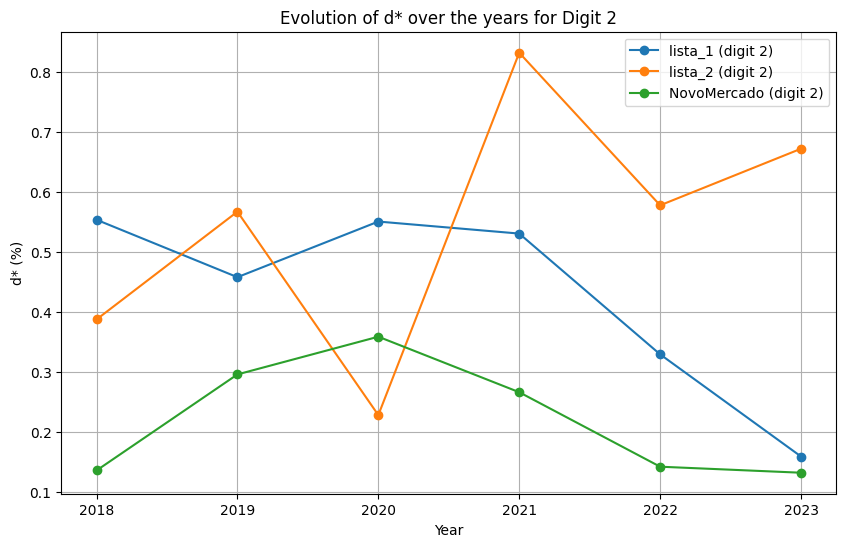

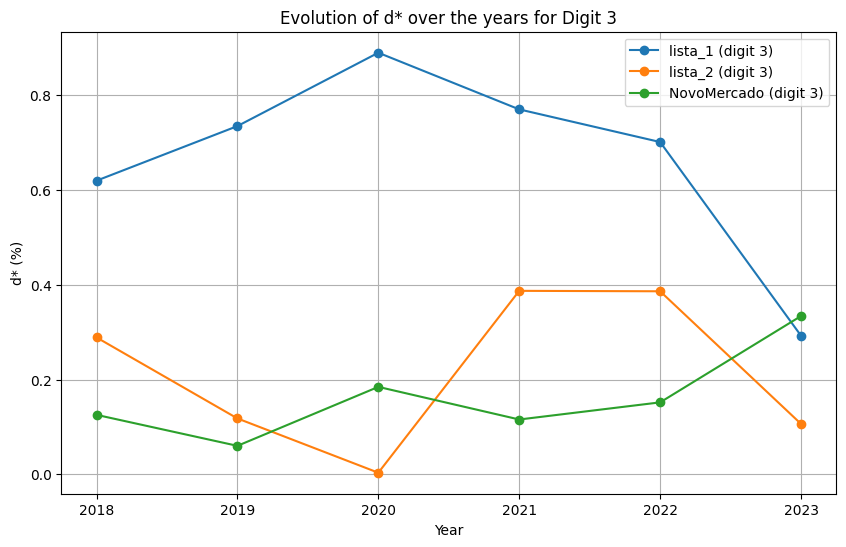

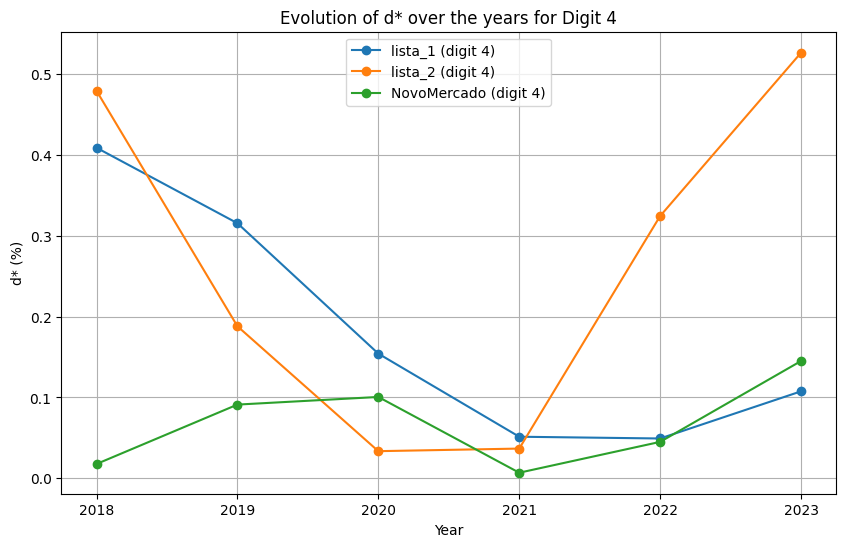

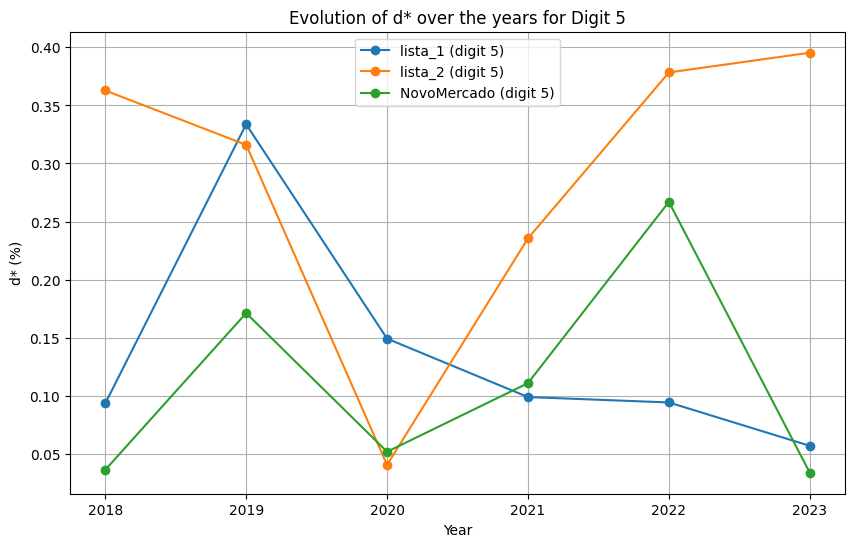

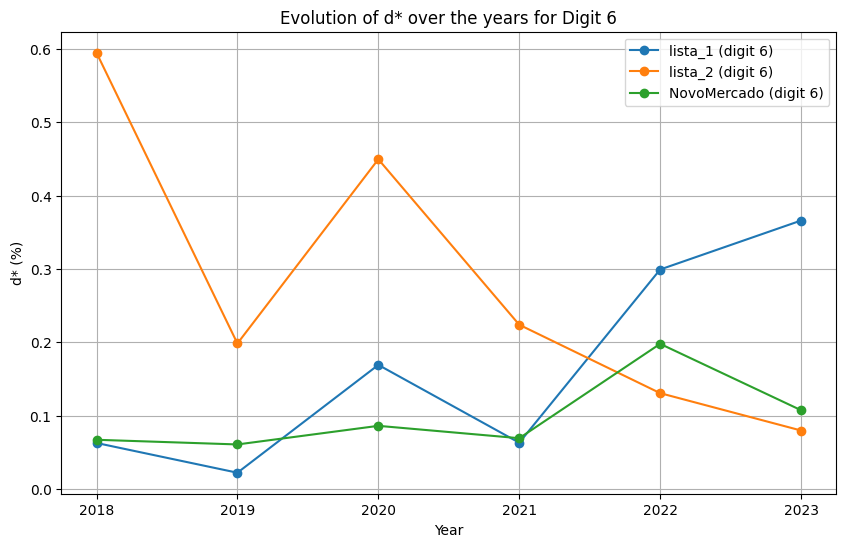

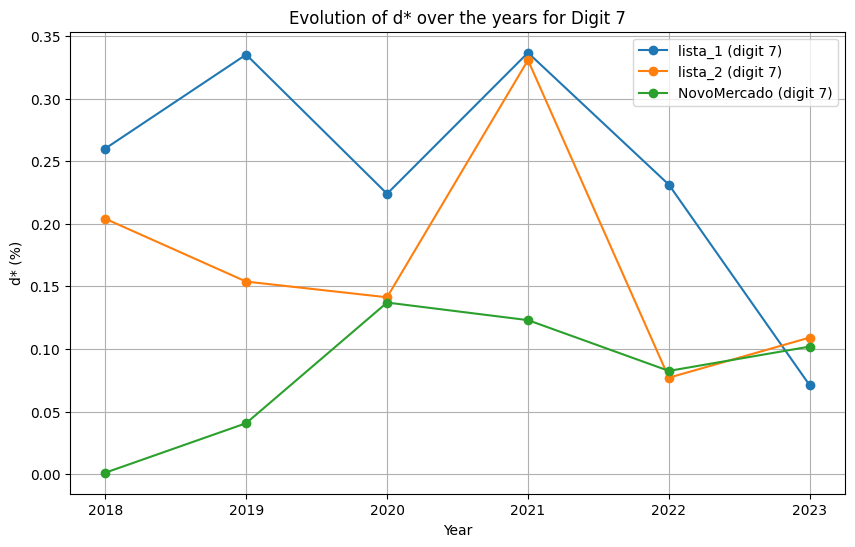

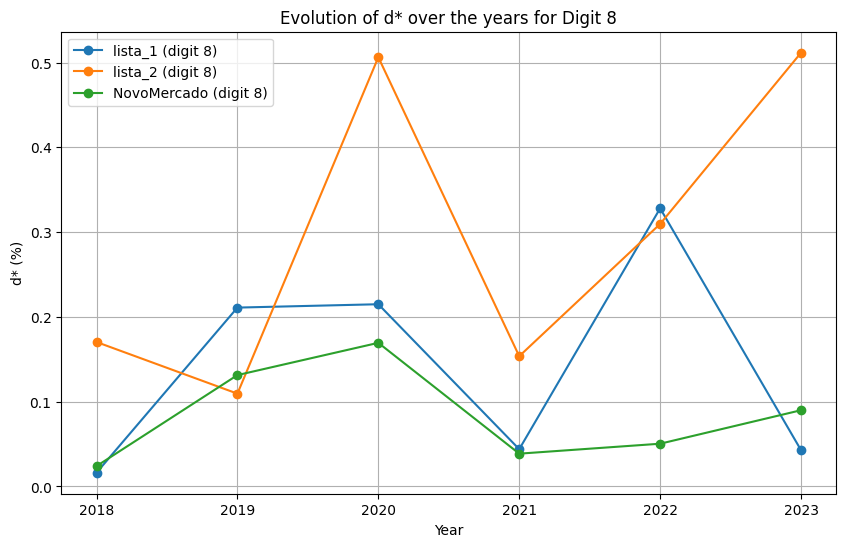

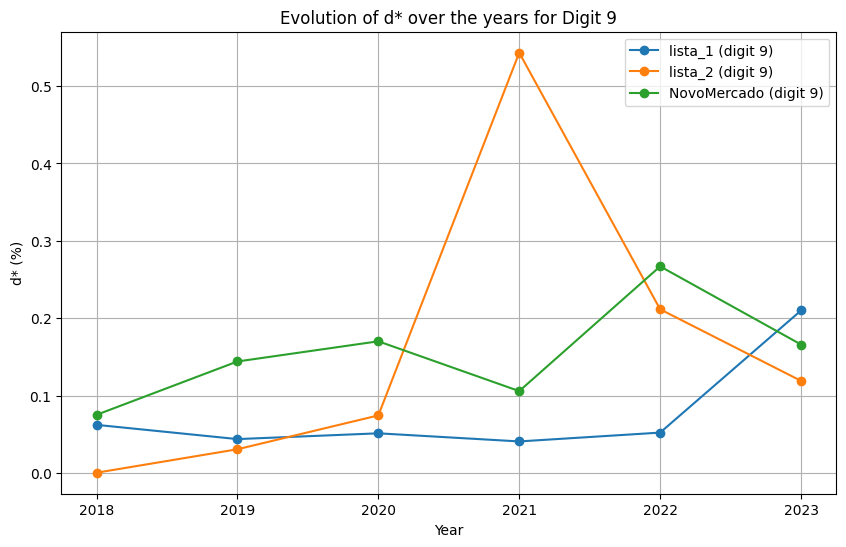

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store d* values for each digit by category
d_star_by_digit_and_category = {
    digit: {category: [] for category in ["lista_1", "lista_2", "NovoMercado"]}
    for digit in range(1, 10)
}

# Iterate over years
for year, df in sorted(dfs_by_year.items()):  # Sort years while iterating
    print(f"Analyzing year {year}:")

    # Calculate d* for each category
    for category in ["lista_1", "lista_2", "NovoMercado"]:
        # Filter DataFrame for the current category
        df_category = df[df['code'] == category]

        if df_category.empty:
            print(f"No data for category {category} in year {year}.")
            continue

        # Get first-digit frequencies for the category
        freq_category = count_first_digits(df_category)
        print(f"First-digit frequencies for category {category} in year {year}:")
        print(freq_category)

        # Calculate observed distribution in percentages for each digit
        total_observed = sum(freq_category.values())
        observed_perc = [(freq_category.get(str(d), 0) / total_observed) * 100 for d in range(1, 10)]

        # Calculate expected Benford distribution in percentages
        benford_percentages = [benford_distribution(d) for d in range(1, 10)]

        # Calculate d* for each digit between observed and expected frequencies
        for digit in range(1, 10):
            d_star_value = calculate_d_star(
                [observed_perc[digit - 1]],
                [benford_percentages[digit - 1]]
            )
            d_star_by_digit_and_category[digit][category].append({'year': year, 'd_star': d_star_value})
            print(f"d* for digit {digit} in category {category} in year {year}: {d_star_value}%")

# Plot d* values over the years for each digit
for digit in range(1, 10):
    plt.figure(figsize=(10, 6))
    for category, values in d_star_by_digit_and_category[digit].items():
        # Extract years and d* values for each category
        years_for_category = [entry['year'] for entry in values]
        d_star_values = [entry['d_star'] for entry in values]

        # Add the line for this category and digit
        plt.plot(years_for_category, d_star_values, marker='o', label=f'{category} (digit {digit})')

    # Plot configuration
    plt.xlabel("Year")
    plt.ylabel("d* (%)")
    plt.title(f"Evolution of d* over the years for Digit {digit}")
    plt.legend()
    plt.grid(True)
    plt.show()



The Novo Mercado was the one that presented the smallest amplitude, in almost all digits, and Level 1 was the one that had the largest amplitude in almost all digit.

Analyzing year 2018:
d* for digit 1 in year 2018: 0.2885314203197582%
d* for digit 2 in year 2018: 0.0314828004427661%
d* for digit 3 in year 2018: 0.036527449553089626%
d* for digit 4 in year 2018: 0.00026635309015837555%
d* for digit 5 in year 2018: 0.004182917055961634%
d* for digit 6 in year 2018: 0.13510397605960608%
d* for digit 7 in year 2018: 0.004891538615703904%
d* for digit 8 in year 2018: 0.048463901718051434%
d* for digit 9 in year 2018: 0.03597831789634004%
Analyzing year 2019:
d* for digit 1 in year 2019: 0.2429957554758375%
d* for digit 2 in year 2019: 0.15921334947582527%
d* for digit 3 in year 2019: 0.11399468455457042%
d* for digit 4 in year 2019: 0.05743504112712607%
d* for digit 5 in year 2019: 0.06381580155542395%
d* for digit 6 in year 2019: 0.08066526738934518%
d* for digit 7 in year 2019: 0.025739121399258352%
d* for digit 8 in year 2019: 0.07640115134292644%
d* for digit 9 in year 2019: 0.040288733205027454%
Analyzing year 2020:
d* for digit 1 in year 2020: 0.

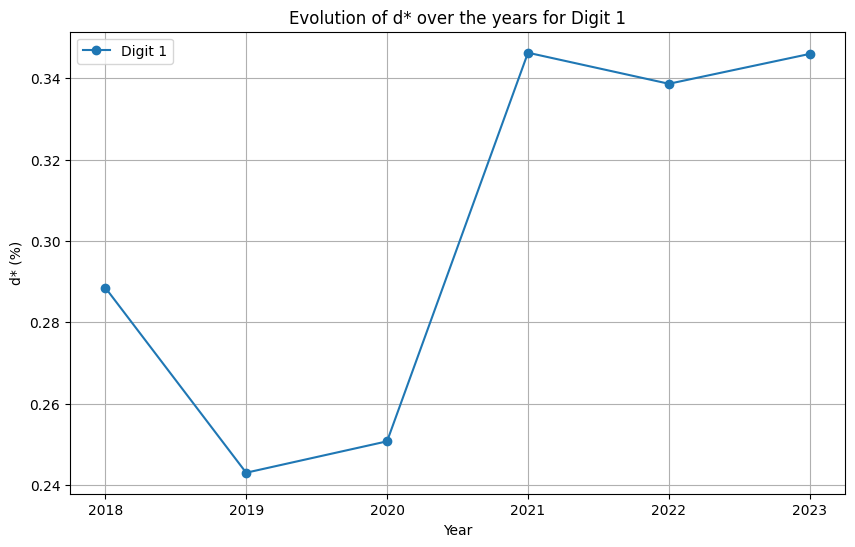

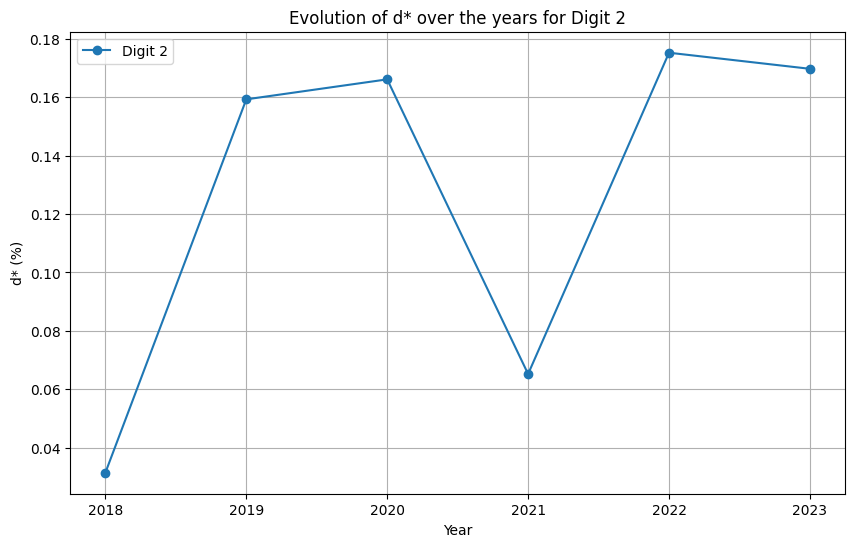

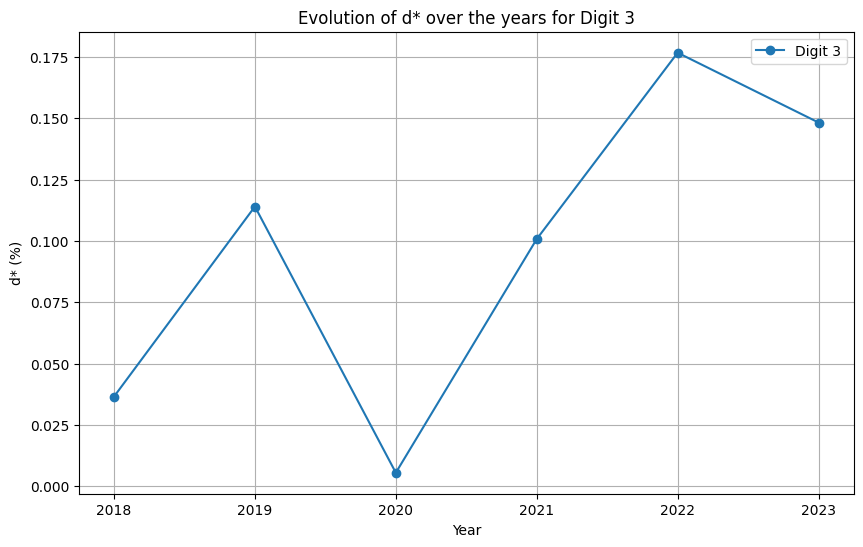

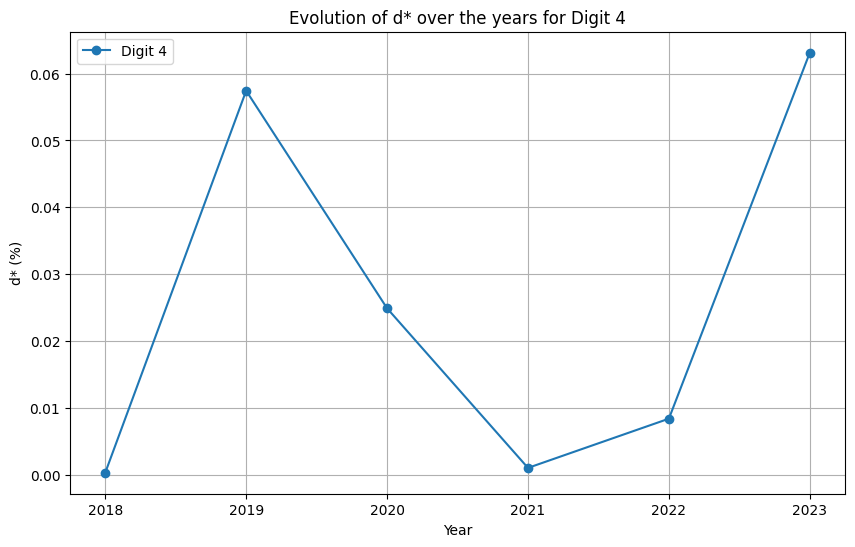

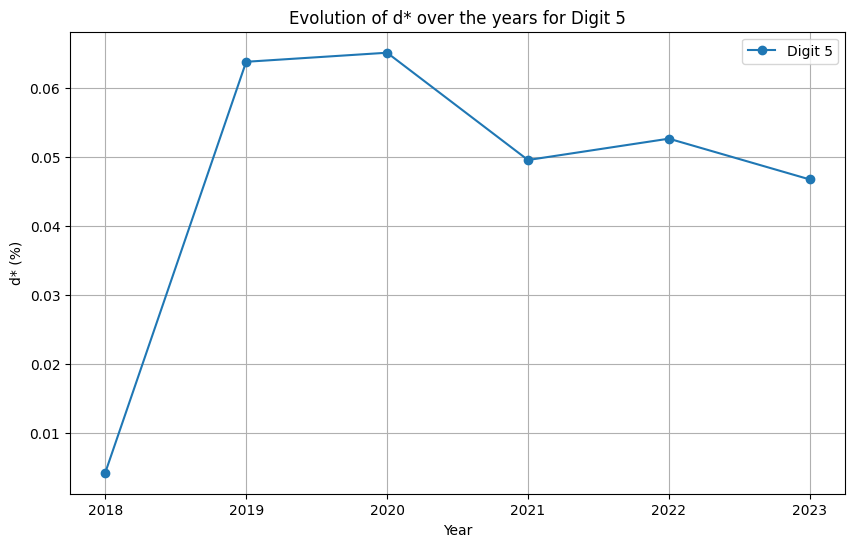

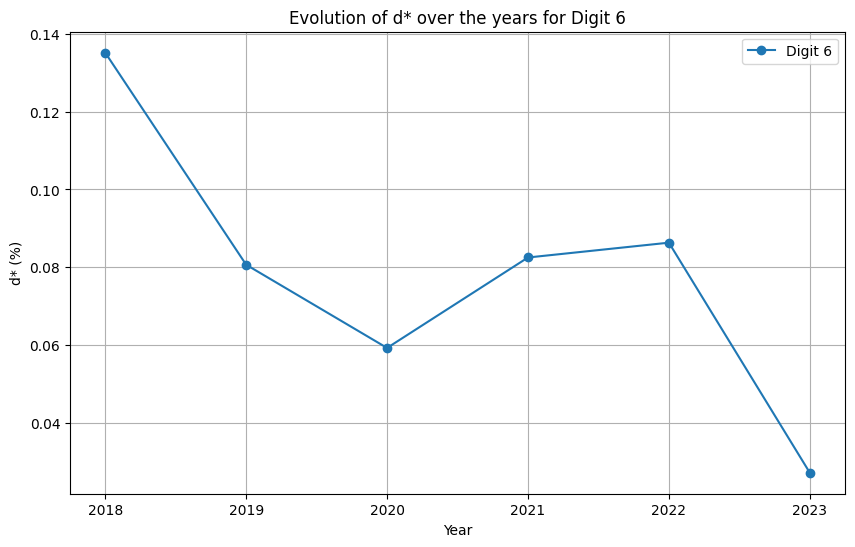

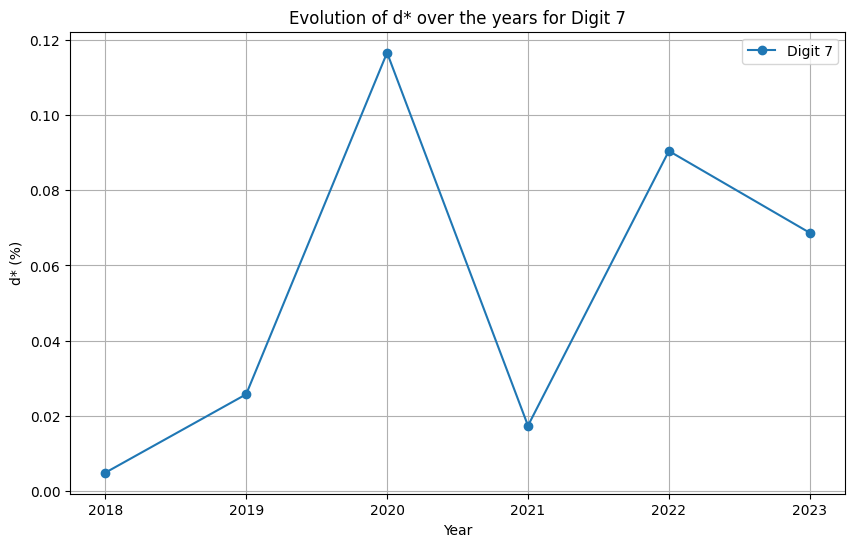

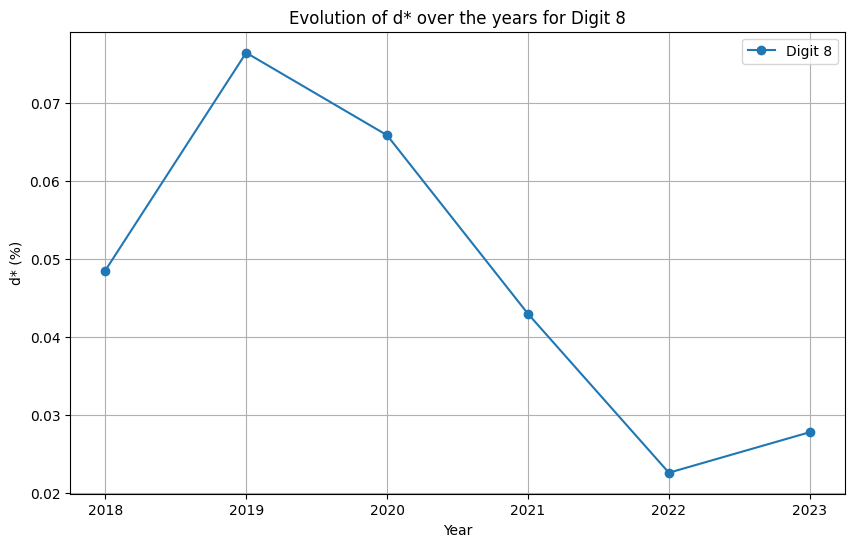

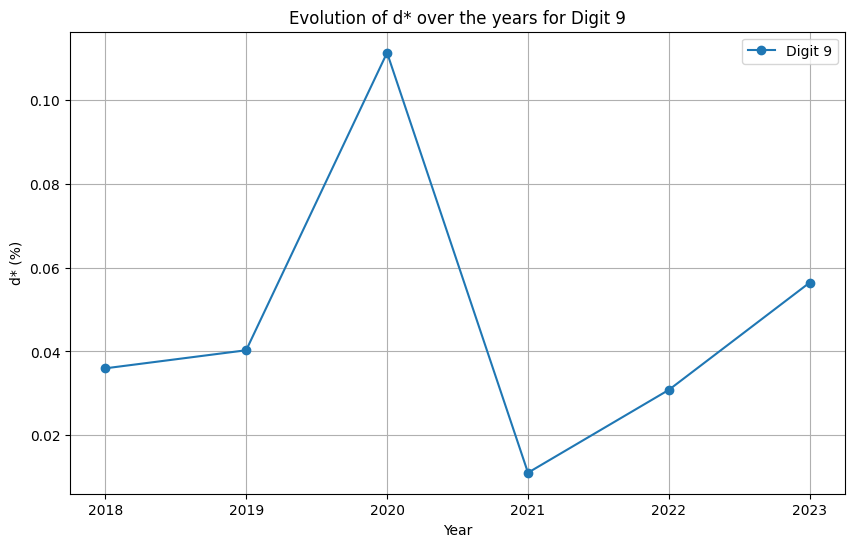

In [ ]:
import matplotlib.pyplot as plt

years = []
d_star_by_digit = {digit: [] for digit in range(1, 10)}  # Store d* for each digit

# Iterate over years and calculate for all companies combined
for year, df in sorted(dfs_by_year.items()):  # Sort years while iterating
    print(f"Analyzing year {year}:")

    # Get first-digit frequencies for all companies combined
    total_frequencies = count_first_digits(df)

    # Convert frequencies to percentages
    observed_perc = convert_to_percentage(total_frequencies)

    # Calculate expected Benford distribution in percentages
    benford_percentages = [benford_distribution(d) for d in range(1, 10)]

    # Calculate d* between observed and expected percentages for each digit
    for digit in range(1, 10):
        d_star_value = calculate_d_star([observed_perc[digit - 1]], [benford_percentages[digit - 1]])
        d_star_by_digit[digit].append(d_star_value)
        print(f"d* for digit {digit} in year {year}: {d_star_value}%")

    # Add the year to the list
    years.append(year)

# Plot d* values over the years for each digit
for digit in range(1, 10):
    plt.figure(figsize=(10, 6))
    plt.plot(years, d_star_by_digit[digit], marker='o', label=f'Digit {digit}')

    # Plot configuration
    plt.xlabel("Year")
    plt.ylabel("d* (%)")
    plt.title(f"Evolution of d* over the years for Digit {digit}")
    plt.legend()
    plt.grid(True)
    plt.show()


It appears that the smaller a digit is, the higher the chance it has of greater amplitude.

# Risk analysis

# 📊 Analysis of Benford's Law Adherence

This analysis applies **Benford's Law** to company financial data to detect anomalies, evaluate reliability, and support auditing. Benford's Law predicts the frequency of first digits in naturally occurring datasets. For example, numbers starting with `1` appear around **30% of the time**, `2` around **17.6%**, etc.

---

## 1️⃣ Why This Analysis is Important

- **Objective:** Detect anomalies in company-reported data.
- **Application:** Auditing, fraud detection, and assessing data reliability.
- Even if data seems natural, **errors, manipulations, or inconsistencies** can distort the expected digit distribution.
- Comparing observed data to Benford's Law can flag **suspicious patterns**.

---

## 2️⃣ Why `d*` Alone is Not Enough

The `d*` metric measures the overall distance between the observed and expected digit distributions:

\[
d^* = \sqrt{\sum_{i=1}^{9} (O_i - E_i)^2} / K
\]

Where:  
- \(O_i\) = observed percentage for digit \(i\)  
- \(E_i\) = expected percentage according to Benford  
- \(K\) = normalization constant  

**Limitations of `d*`:**  
- Provides a **single number summary**, good for ranking but not for seeing which digits deviate.  
- Doesn’t indicate **statistical significance**, so deviations could be random.  
- May **miss subtle issues** or generate false positives in audits.

---

## 3️⃣ Other Metrics Used and Their Significance

| Metric | What It Measures | Why It’s Useful |
|--------|-----------------|----------------|
| **Kolmogorov-Smirnov (KS) p-value** | Maximum difference between cumulative observed and expected distributions | Detects overall deviation pattern; shows if deviation is statistically significant |
| **Chi-square p-value** | Sum of squared deviations normalized by expected counts | Sensitive to larger deviations in specific digits; widely used in auditing |
| **MAD (Mean Absolute Deviation)** | Average absolute difference per digit | Provides a simple, easy-to-understand measure of overall adherence |
| **Conformity Probability (%)** | Converts MAD into a 0–100 scale | Intuitive ranking of companies/groups from most to least compliant |

---

## 4️⃣ How This Multi-Metric Approach Adds Insight

1. Identify **specific companies or groups** with suspicious reporting.  
2. Observe **patterns over time** (yearly evolution).  
3. Use a **robust auditing framework**:  
   - `d*` = general deviation  
   - KS / Chi-square = statistical significance  
   - MAD = average deviation per digit  
   - Conformity probability = clear ranking  
4. Together, these metrics provide a **complete picture** of financial reporting compliance, more reliable than using `d*` alone.

---

✅ **Summary:**  
- `d*` is a quick indicator, but insufficient by itself.  
- KS and Chi-square provide **statistical backing**.  
- MAD gives **average deviation per digit**.  
- Conformity probability converts results into an **interpretable audit score**.  
- **Combined metrics ensure robust detection of anomalies and trustworthy reporting**.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, chisquare

# =============================
# Helper functions
# =============================

# Theoretical Benford distribution
benford_dist = np.log10(1 + 1 / np.arange(1, 10))

# Extract valid first digit
def get_first_digit(value):
    s = str(value).lstrip('-').lstrip('0')
    return int(s[0]) if s and s[0].isdigit() else None

# Observed normalized frequency
def observed_distribution(df):
    digits = df['VL_CONTA'].apply(get_first_digit).dropna()
    counts = digits.value_counts().sort_index()
    total = counts.sum()
    return (counts / total).reindex(range(1, 10), fill_value=0).values

# Conformity tests
def benford_tests(df):
    obs = observed_distribution(df)
    ks_stat, ks_p = kstest(obs, benford_dist)             # Kolmogorov-Smirnov Test
    chi_stat, chi_p = chisquare(obs, f_exp=benford_dist)  # Chi-Square Test
    mad = np.mean(np.abs(obs - benford_dist))            # Mean Absolute Deviation
    return ks_p, chi_p, mad

# Probability of conformity (0-100 scale)
def conformity_score(mad):
    return max(0, (1 - mad / 0.015) * 100)  # 0.015 threshold recommended for Benford

# =============================
# Overall and by specific list
# =============================
results = []
lists = ['NovoMercado', 'lista_1']  # main lists

for year, df in dfs_by_year.items():
    # --- Overall ---
    ks_p, chi_p, mad = benford_tests(df)
    results.append(['Overall', year, ks_p, chi_p, mad, conformity_score(mad)])

    # --- Specific lists ---
    if 'code' in df.columns:
        for lista in lists:
            subset = df[df['code'] == lista]
            if not subset.empty:
                ks_p, chi_p, mad = benford_tests(subset)
                results.append([lista, year, ks_p, chi_p, mad, conformity_score(mad)])

        # --- Group "Others" ---
        subset_others = df[~df['code'].isin(lists)]
        if not subset_others.empty:
            ks_p, chi_p, mad = benford_tests(subset_others)
            results.append(['Others', year, ks_p, chi_p, mad, conformity_score(mad)])

# =============================
# Per specific company
# =============================
for year, df in dfs_by_year.items():
    for company in df['DENOM_CIA'].unique():
        subset = df[df['DENOM_CIA'] == company]
        if len(subset) > 30:  # minimum observations for reliable test
            ks_p, chi_p, mad = benford_tests(subset)
            results.append([company, year, ks_p, chi_p, mad, conformity_score(mad)])

# =============================
# Final DataFrame of results
# =============================
benford_results = pd.DataFrame(
    results,
    columns=['Group', 'Year', 'KS_p', 'Chi_p', 'MAD', 'Conformity_Probability(%)']
)

# =============================
# Top adherent and anomalous companies/groups
# =============================
print("\n📊 Top 10 groups/companies with highest adherence to Benford's Law:")
print(benford_results.sort_values('Conformity_Probability(%)', ascending=False).head(10))

print("\n🚨 Top 10 with lowest adherence (potential anomalies):")
print(benford_results.sort_values('Conformity_Probability(%)', ascending=True).head(10))




📊 Top 10 groups/companies with highest adherence to Benford's Law:
          Group  Year  KS_p  Chi_p       MAD  Conformity_Probability(%)
0       Overall  2018   1.0    1.0  0.000674                  95.507117
1   NovoMercado  2018   1.0    1.0  0.000740                  95.064793
23       Others  2023   1.0    1.0  0.000791                  94.728849
7        Others  2019   1.0    1.0  0.000792                  94.721403
15       Others  2021   1.0    1.0  0.000815                  94.565486
12      Overall  2021   1.0    1.0  0.000825                  94.499012
3        Others  2018   1.0    1.0  0.000946                  93.693402
4       Overall  2019   1.0    1.0  0.000991                  93.395701
8       Overall  2020   1.0    1.0  0.000996                  93.360520
11       Others  2020   1.0    1.0  0.001069                  92.876058

🚨 Top 10 with lowest adherence (potential anomalies):
                                            Group  Year      KS_p     Chi_p  \
2933  


📊 Plots of the 10 groups/companies with highest adherence to Benford's Law:


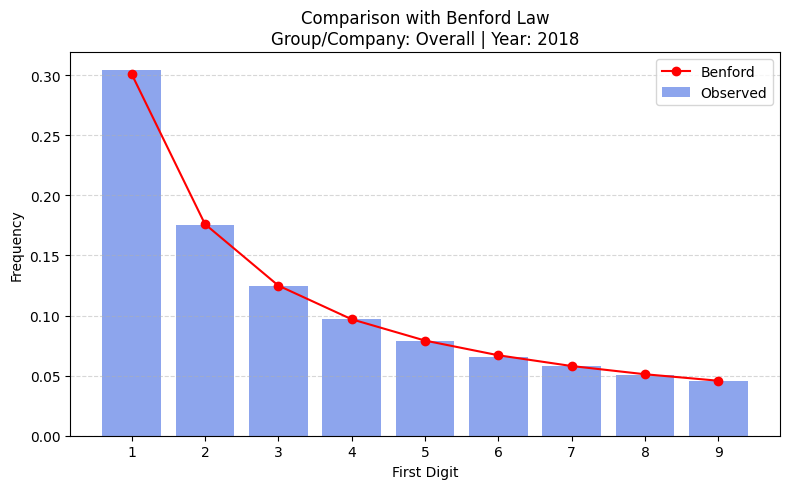

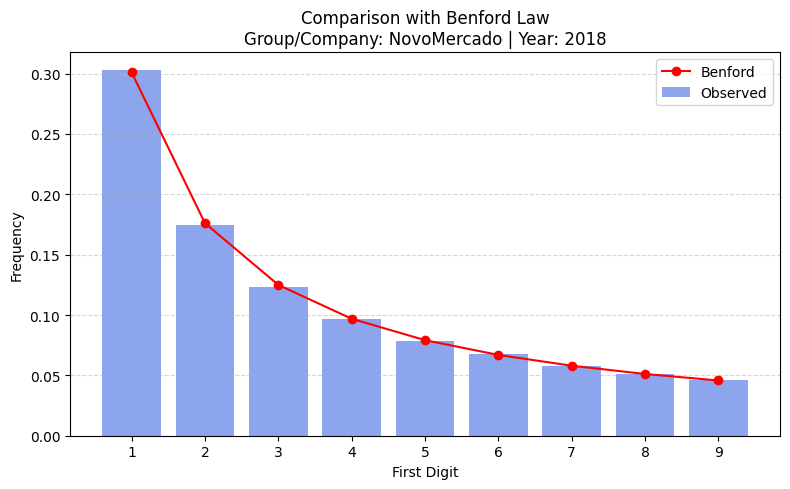

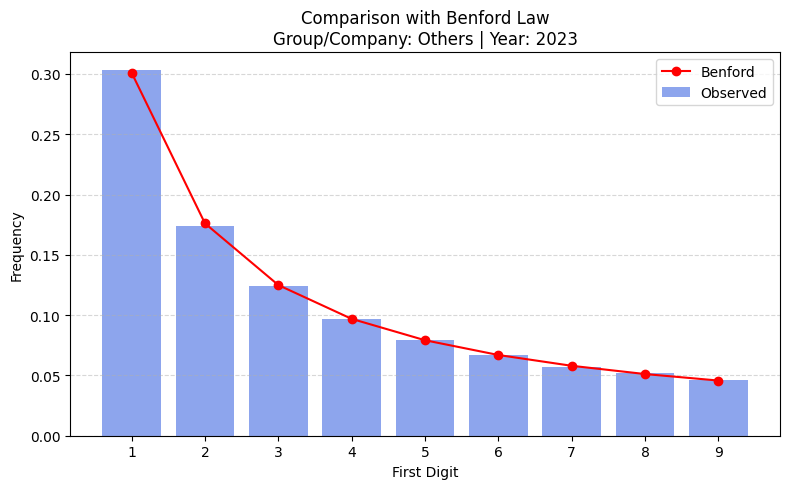

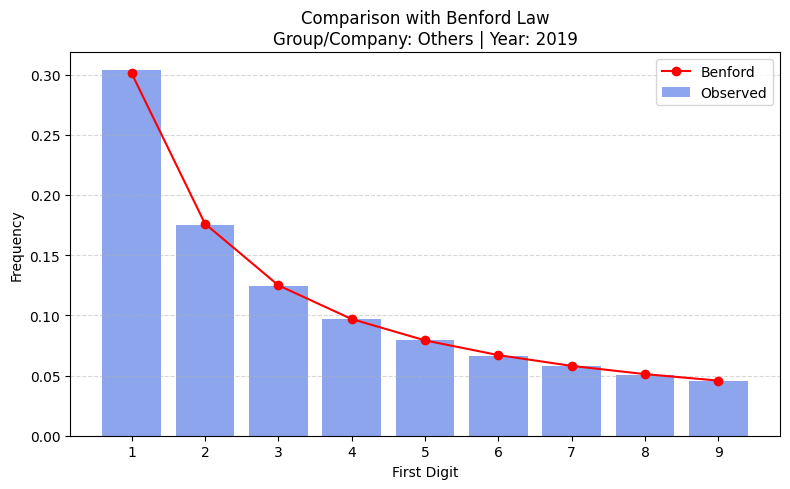

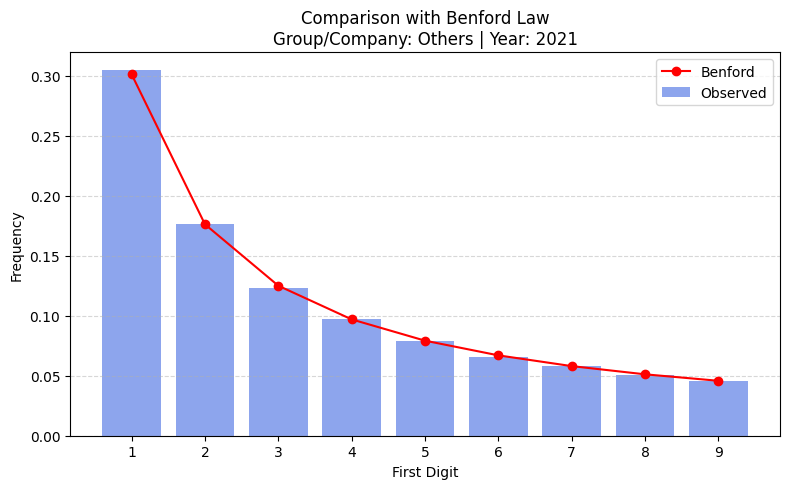

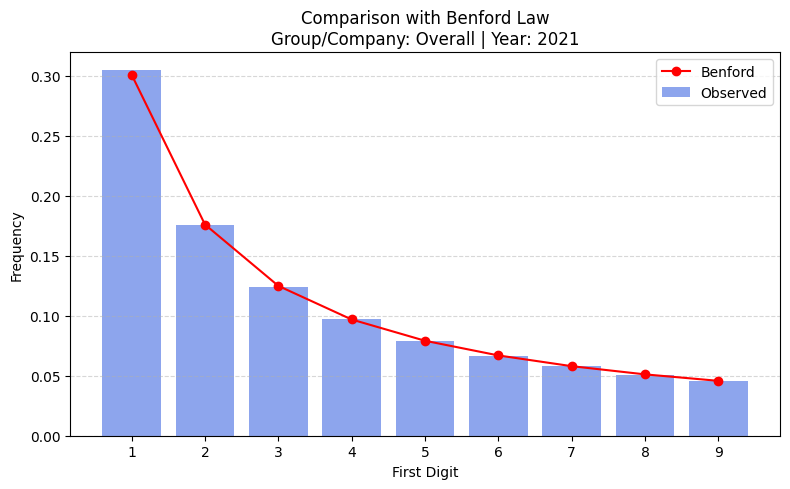

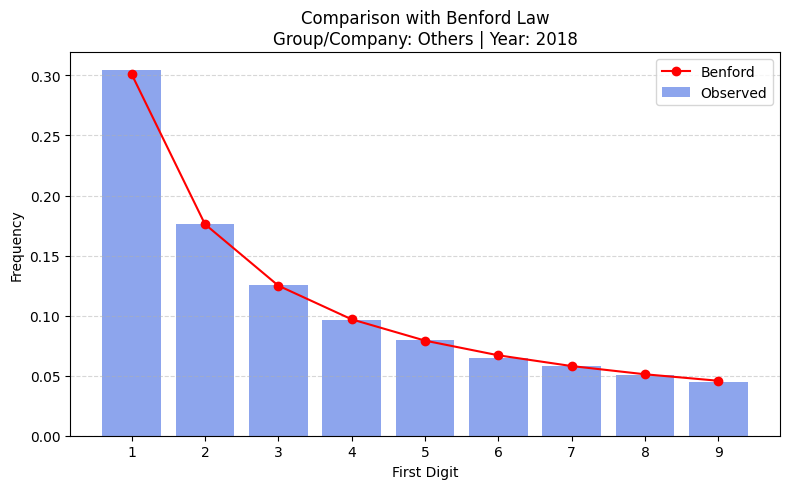

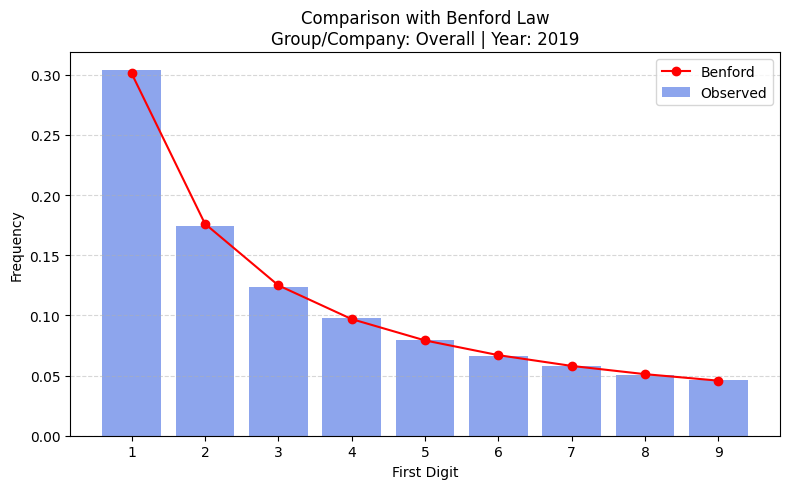

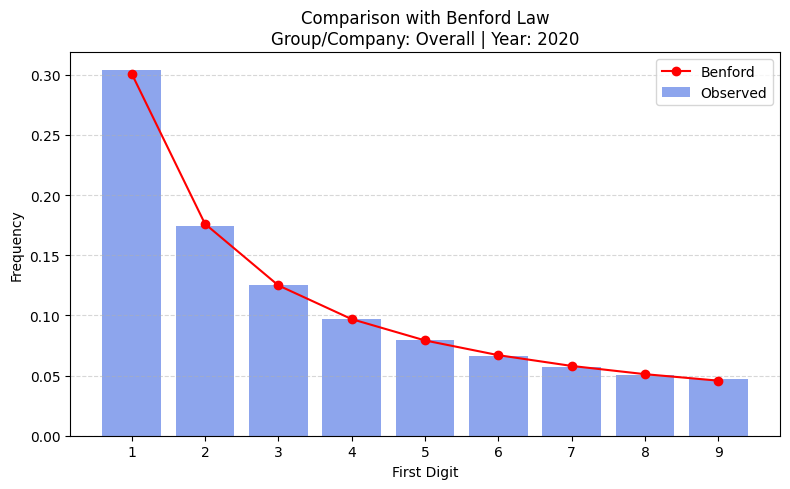

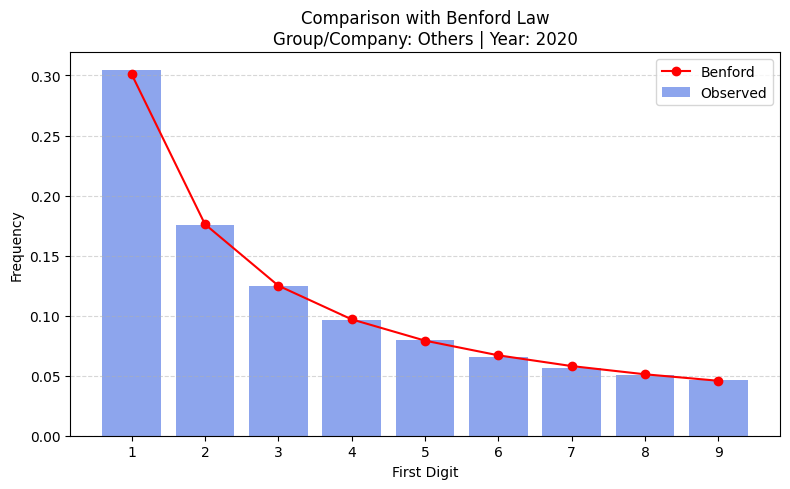


🚨 Plots of the 10 groups/companies with lowest adherence (potential anomalies):


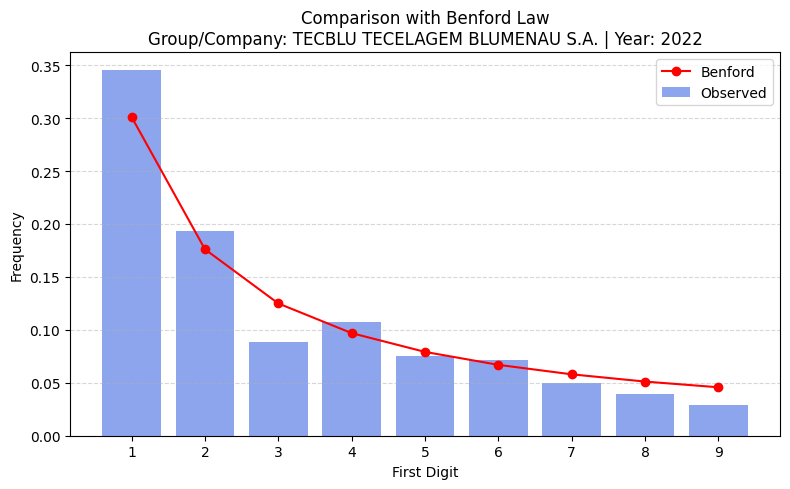

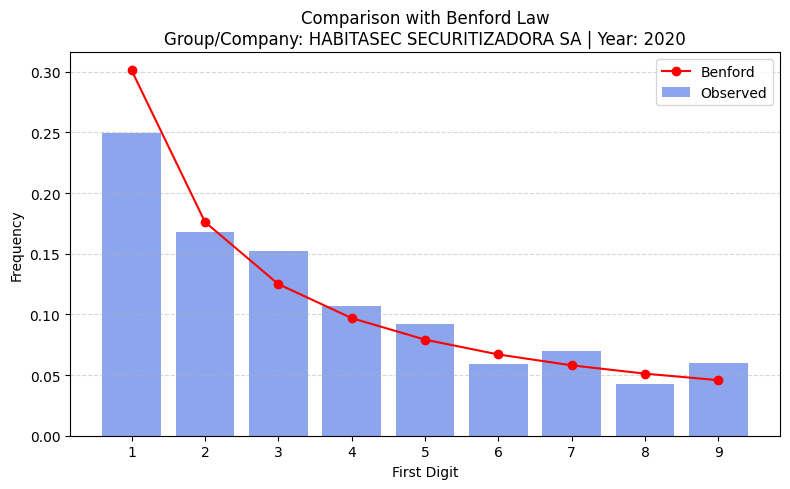

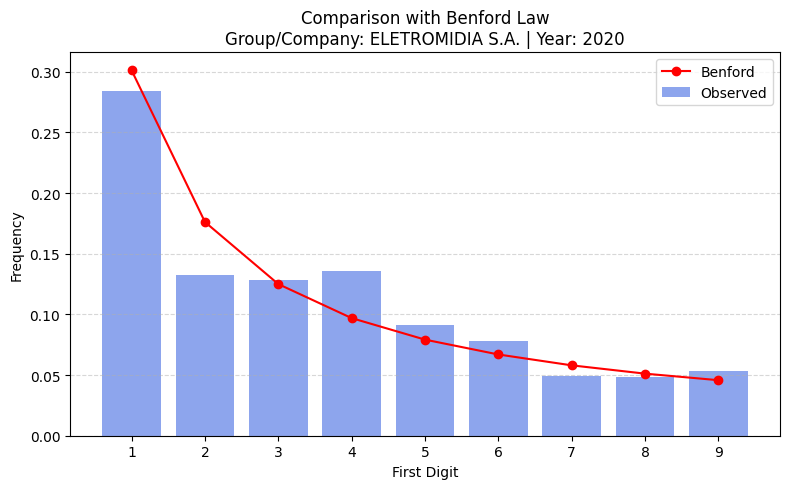

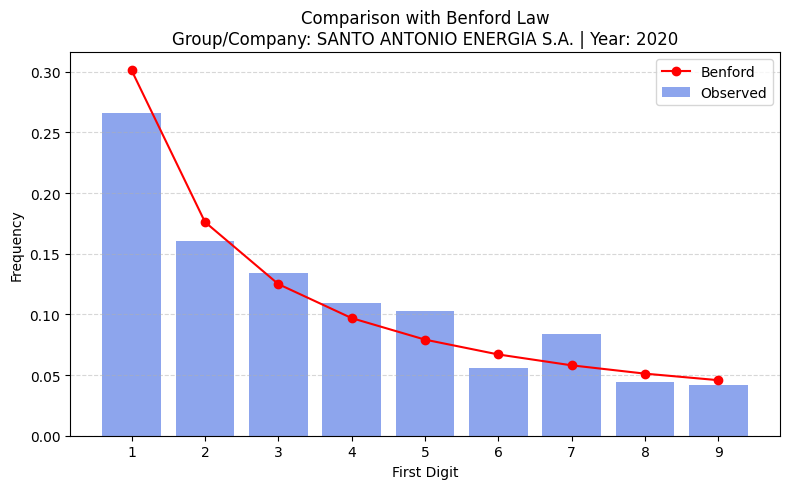

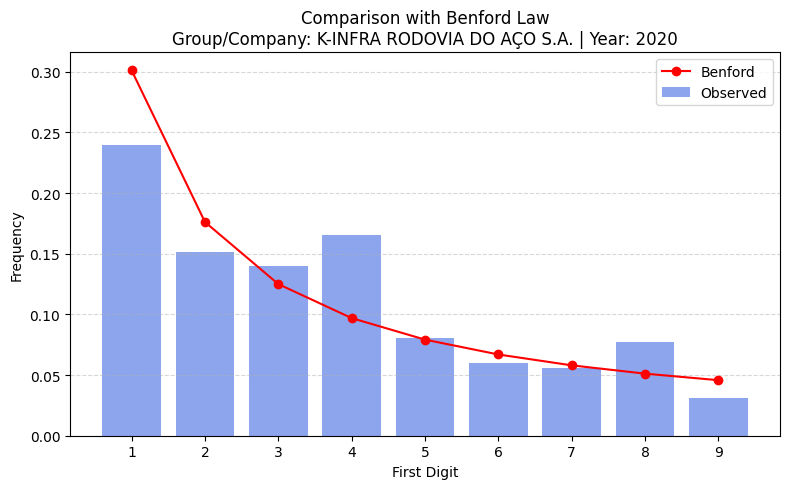

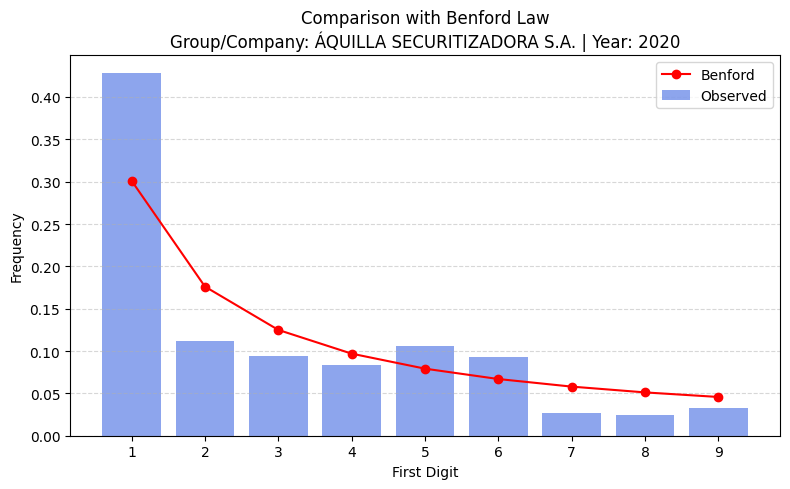

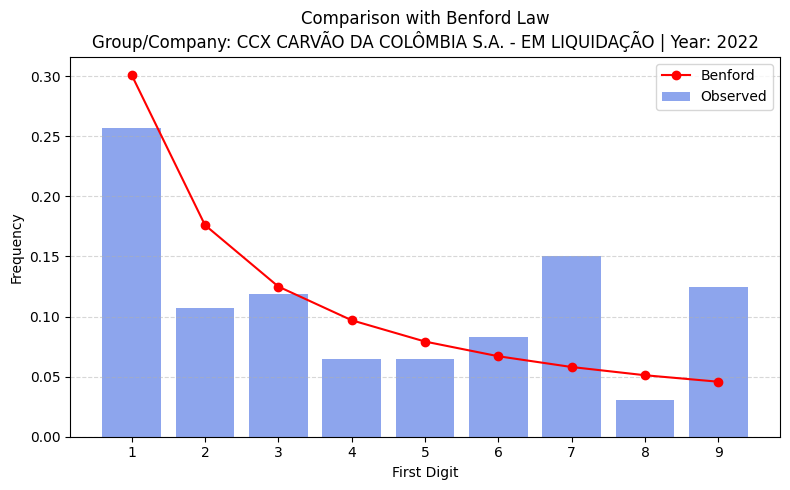

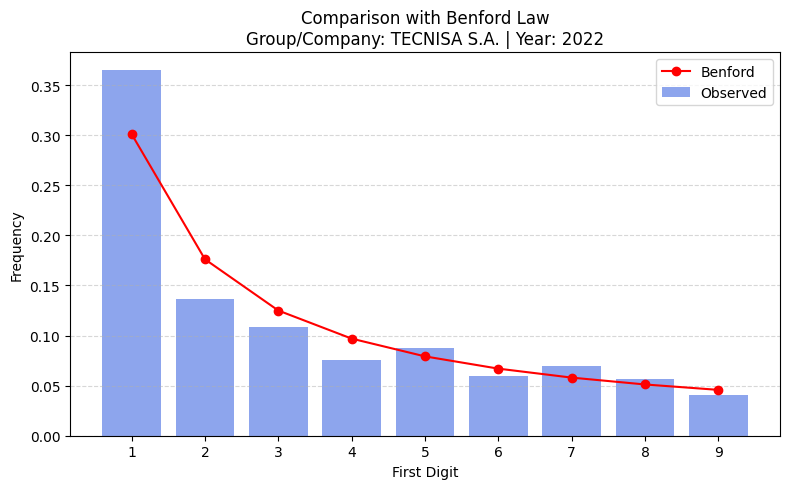

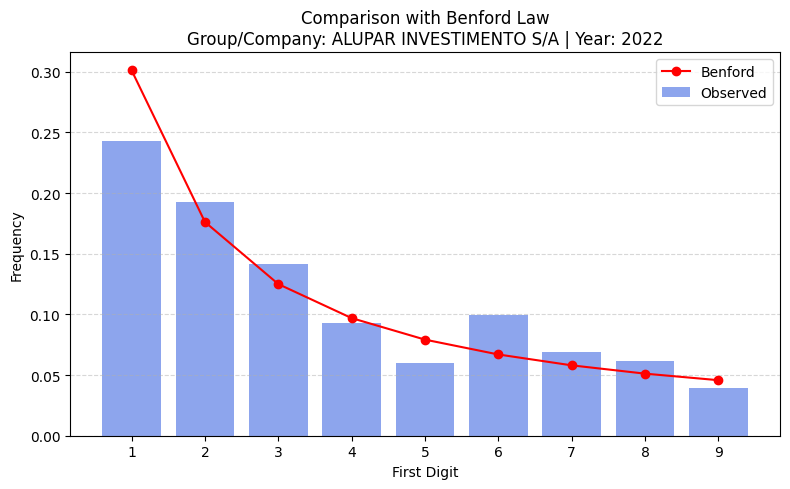

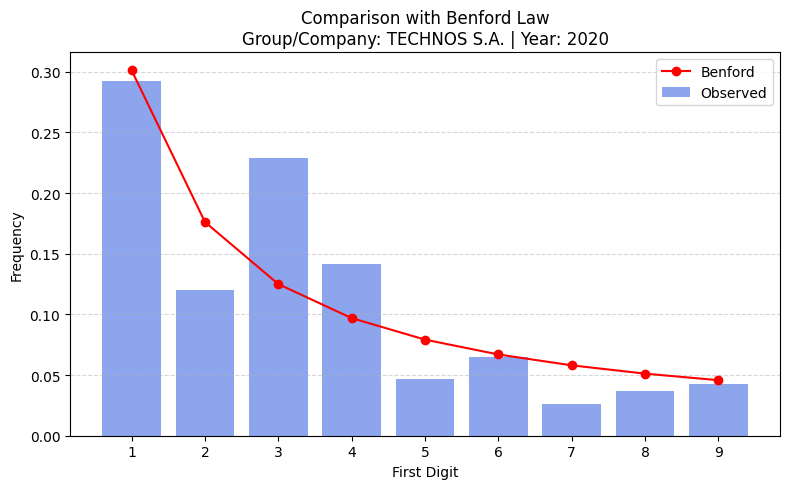

In [ ]:
def plot_benford_comparison(group, year):
    """
    Plots a comparison of the observed distribution vs. theoretical Benford distribution.
    """
    subset = dfs_by_year[year]

    # Filter by company or code if applicable
    if group in subset['DENOM_CIA'].unique():
        subset = subset[subset['DENOM_CIA'] == group]
    elif 'code' in subset.columns and group in subset['code'].unique():
        subset = subset[subset['code'] == group]
    elif group == 'Others' and 'code' in subset.columns:
        subset = subset[~subset['code'].isin(['NovoMercado', 'lista_1'])]

    # Calculate observed distribution
    obs = observed_distribution(subset)

    plt.figure(figsize=(8, 5))
    plt.bar(np.arange(1, 10), obs, alpha=0.6, label='Observed', color='royalblue')
    plt.plot(np.arange(1, 10), benford_dist, 'o-', color='red', label='Benford')
    plt.xticks(np.arange(1, 10))
    plt.title(f'Comparison with Benford Law\nGroup/Company: {group} | Year: {year}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# =============================
# Top 10 most and least adherent groups/companies
# =============================
top10 = benford_results.sort_values('Conformity_Probability(%)', ascending=False).head(10)
bottom10 = benford_results.sort_values('Conformity_Probability(%)', ascending=True).head(10)

# =============================
# Plot top 10 adherent groups/companies
# =============================
print("\n📊 Plots of the 10 groups/companies with highest adherence to Benford's Law:")
for _, row in top10.iterrows():
    plot_benford_comparison(row['Group'], row['Year'])

# =============================
# Plot top 10 anomalous groups/companies
# =============================
print("\n🚨 Plots of the 10 groups/companies with lowest adherence (potential anomalies):")
for _, row in bottom10.iterrows():
    plot_benford_comparison(row['Group'], row['Year'])